# TME UE IAR: From Traditional EA to Quality-Diversity algorithms

Version du 26 novembre 2022

* Etudiant1: Corcoral Thomas
* Etudiant2: Kostadinovic Nikola

**Pour faciliter le suivi, merci à chaque membre du binome de soumettre le TME sous son nom.**

Cette séance de TME consiste à mettre en oeuvre des méthodes d'apprentissage de type "direct policy search" s'appuyant sur des algorithmes évolutionnaires. 

Ces algorithmes s'appuient sur des opérateurs de recherche stochastiques. Si vous lancez plusieurs fois une même expérience avec une graine aléatoire différente vous obtiendrez des résultats différents. Dans la mesure du possible et de la puissance de calcul que vous avez à disposition et s'il n'a pas été demandé explicitement de ne faire qu'une seule expérience, il est donc souhaitable de répéter les expériences plusieurs fois avant de conclure.

Les cellules à compléter sont marquées <à compléter>.

Vous prendrez soin de mettre des commentaires dans votre code et, pour chaque question, vous décrirez rapidement le travail réalisé. Vous prendrez soin de ne soumettre que les fichiers nécessaires (merci d'éviter les fichiers de log inutiles et de taille conséquente...).

## 1. Introduction

### 1.1 Dépendances

La seule dépendance nécessaire à ce TP est DEAP que vous pourrez installer de la façon suivante:



In [3]:
# !pip install deap
# !pip install plot

     |████████████████████████████████| 135 kB 1.8 MB/s eta 0:00:01
     |████████████████████████████████| 78 kB 3.9 MB/s eta 0:00:01
  Created wheel for typing: filename=typing-3.7.4.3-py3-none-any.whl size=26325 sha256=5bdeae488b253ec7aa3beb26d495300b51d40f462a3e8ba771bc19531232e2c1
  Stored in directory: /home/thomas/.cache/pip/wheels/fa/17/1f/332799f975d1b2d7f9b3f33bbccf65031e794717d24432caee
Successfully built typing


In [26]:
# Il n'y a rien à faire d'autre que d'exécuter cette cellule, 
# elle contient des imports qui vous seront utiles

# Note: l'import d'un fichier ne se fait qu'une seule fois. Si vous modifiez ce fichier, 
# il vous faut redémarrer votre kernel si vous voulez prendre en compte les modifications.
# vous pouvez éviter cela de la façon suivante: 
import importlib # une seule fois
import plot # le module doit avoir été importé une première fois
importlib.reload(plot) # cette ligne permet de charger la dernière version

import matplotlib.pyplot as plt

# pour que les figures apparaissent directement dans le notebook
%matplotlib inline 

### 1.2 Environnement utilisé pour les expériences

Vous allez utiliser un environnement simplifié pour permettre aux calculs d'être suffisamment rapides quelque soit votre environnement de travail. Il s'agit de la simulation d'un bras robotique articulé. Les paramètres explorés par l'algorithme évolutionnaire correspondent à l'angle que fait chaque segment par rapport au segment précédent. Il n'y a donc pas de politique à proprement parler.

Représentation d'un bras à 3 degrés de liberté avec la cible et les obstacles qui seront utilisés dans la suite.


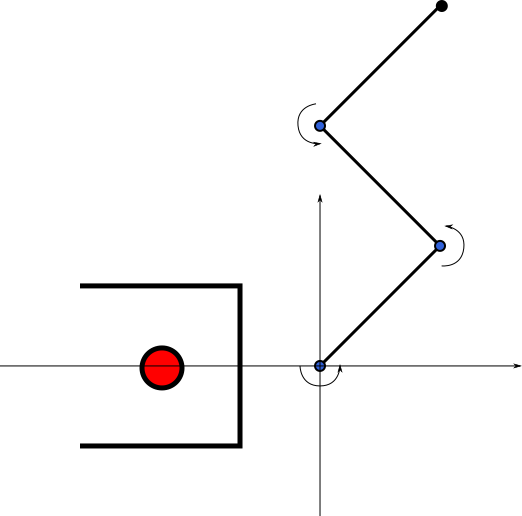

In [5]:
from IPython.display import Image

fig = Image(filename=('bras.png'))
print("Représentation d'un bras à 3 degrés de liberté avec la cible et les obstacles qui seront utilisés dans la suite.")
fig

L'objectif des expériences est de déterminer les configurations du bras permettant d'atteindre diverses positions de l'espace avec l'effecteur terminal. Ces configurations peuvent être déterminées par le calcul, mais elles seront déterminées ici par l'algorithme évolutionnaire. Des obstacles ont été ajoutés dans l'environnement. La première partie du TP vise à atteindre la cible en rouge (avec un bras qui disposera de plus de segment que le bras représenté ici). La deuxième partie du TP vise à trouver des configurations du bras permettant d'atteindre l'ensemble des positions atteignables.

## 2 Comparaison des expériences de Fit, NS et Fit+NS

Cette première partie vise à vous faire prendre en main 3 variantes d'apprentissage direct dans l'espace des "politiques" (le terme de "politique" est ici un peu abusif, mais nous l'utiliserons tout de même dans la suite):
- FIT: algorithme élitiste guidé par une fitness globale
- NS: algorithme de recherche de nouveauté (novelty search)
- FIT+NS: algorithme combinant FIT et NS avec une approche multi-objectif 

Vous regarderez attentivement le fichier ea_dps_ka.py et vous le compléterez pour afficher un message chaque fois qu'une politique améliore la fitness globale. A cette occasion, vous sauvegarderez la configuration de cet individu pour pouvoir la tracer ensuite dans les questions suivantes de ce notebook.

### 2.1 Variante Fit

Lancez quelques expériences avec la variante FIT. Tracez l'évolution de la fitness (opposé de la distance à la cible à maximiser) en fonction des générations et donnez les statistiques des résultats obtenus (combien d'expériences atteignent la cible, en combien de génération en moyenne). La cible sera considérée comme atteinte si l'effecteur terminal est à une distance de 0.5 ou moins de celle-ci. Vous tracerez également les configurations intermédiares du bras correspondant à des améliorations de la fitness (vous en tracerez une dizaime maximum pour ne pas surcharger le notebook).

In [8]:
#%run -i 'ea_dps_ka.py'

In [19]:
dir = "completed_runs/res_arm_FIT_2022_12_02_11:53:34/"
f = open(dir+"fit.log", "r")
# print(f.read())

In [20]:
txt = f.read()
fits = txt.split("\n")[1:]

In [21]:
print(fits[:10])

['-1000000', '-4.334256416661932', '-1000000', '-1000000', '-1000000', '-1000000', '-2.655634755651383', '-1000000', '-3.7320387463158435', '-2.5966156304022077']


In [22]:
l = []
_max = -1e6
for fit in fits:
    if len(fit) != 0:
        if fit[0] == "#":
            print(fit)
            l.append(_max)
            _max = -1e6
        else:
            new = float(fit)
            _max = max(_max, new)

## Generation 1 
## Generation 2 
## Generation 3 
## Generation 4 
## Generation 5 
## Generation 6 
## Generation 7 
## Generation 8 
## Generation 9 
## Generation 10 
## Generation 11 
## Generation 12 
## Generation 13 
## Generation 14 
## Generation 15 
## Generation 16 
## Generation 17 
## Generation 18 
## Generation 19 
## Generation 20 
## Generation 21 
## Generation 22 
## Generation 23 
## Generation 24 
## Generation 25 
## Generation 26 
## Generation 27 
## Generation 28 
## Generation 29 
## Generation 30 
## Generation 31 
## Generation 32 
## Generation 33 
## Generation 34 
## Generation 35 
## Generation 36 
## Generation 37 
## Generation 38 
## Generation 39 
## Generation 40 
## Generation 41 
## Generation 42 
## Generation 43 
## Generation 44 
## Generation 45 
## Generation 46 
## Generation 47 
## Generation 48 
## Generation 49 
## Generation 50 
## Generation 51 
## Generation 52 
## Generation 53 
## Generation 54 
## Generation 55 
## Generation 56 
#

In [23]:
fits = txt.split("\n")[1:]
print(fits[6:])
fits = [float(x) for x in fits if len(x)!=0 and x[0]!="#"]

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [24]:
print(fits[:10])

[-1000000.0, -4.334256416661932, -1000000.0, -1000000.0, -1000000.0, -1000000.0, -2.655634755651383, -1000000.0, -3.7320387463158435, -2.5966156304022077]


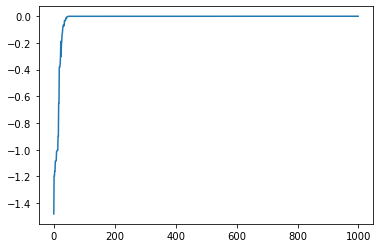

In [27]:
plt.plot([i for i in range(len(l))], l)

On constate que pour FIT, un nombre de génération inférieur à 200 est largement suffisant pour obtenir un mouvement fiable. Cependant nous sommes en droit de nous demander si la suite des générations améliore le score

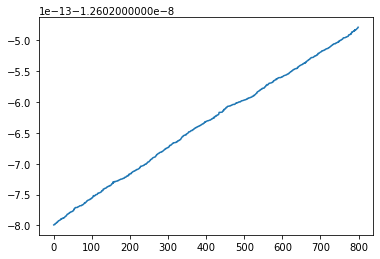

In [28]:
plt.plot([i for i in range(len(l)-200)], l[200:])

Effectivement, la fitness continue d'être améliorée. Cependant étant donné qu'il s'agit de l'unique objectif, ne sommes-nous pas dans du sur-apprentissage. Penchons nous sur le nombre de fois que l'objectif est atteint

In [29]:
import ast

def read_info(file):
    res = []
    l = []
    f = open(file)
    data = f.readlines()
    for d in data:
        if len(d) != 0:
            if d[0] == "#":
                l = []
                res.append(l)
            else:
                d = d.replace("\'", "\"")
                d = d.replace("array", "")
                d = d.replace("(", "")
                d = d.replace(")", "")
                l.append(ast.literal_eval(d))
    return res

In [30]:
dir = "completed_runs/res_arm_FIT_2022_12_02_11:53:34/"
d = read_info(dir+"info.log")

In [31]:
touch_objective = []
for gens in d:
    touch_obj = 0
    for it in gens:
        if abs(it['dist_end_effector']) < 0.5:
            touch_obj += 1
    touch_objective.append(touch_obj)

Text(0, 0.5, "Nombre de fois ou l'objectif est atteint (<0.5)")

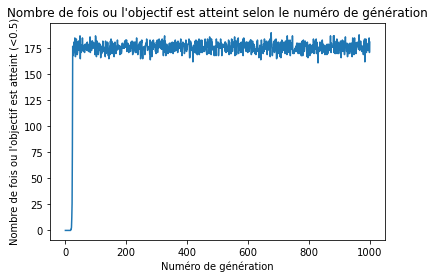

In [32]:
plt.plot([i for i in range(len(touch_objective))], touch_objective)
plt.title("Nombre de fois ou l'objectif est atteint selon le numéro de génération")
plt.xlabel("Numéro de génération")
plt.ylabel("Nombre de fois ou l'objectif est atteint (<0.5)")

On constate que dès lors lorsque la fitness atteint quasiment 0, le nombre de fois ou l'objectif est atteint oscille autour de 175. On observe également que les générations supplémentaires ne permettent ni d'améliorer ce chiffre mais ne le font pas non plus réduire.

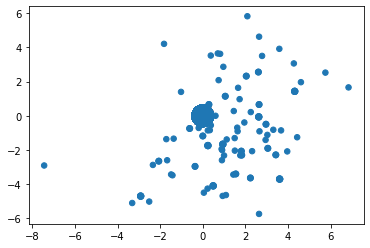

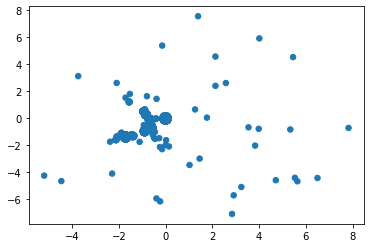

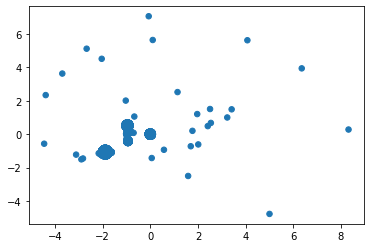

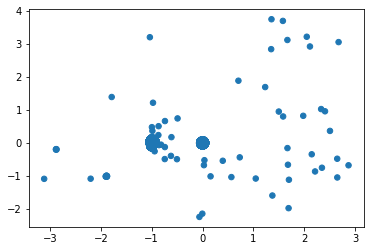

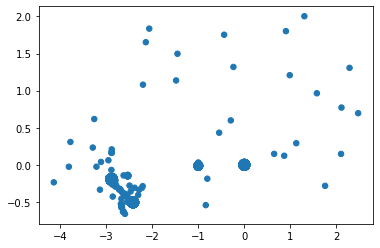

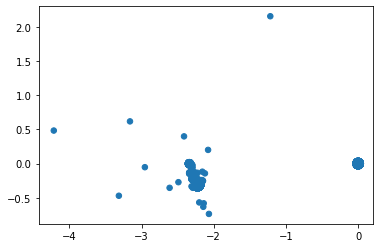

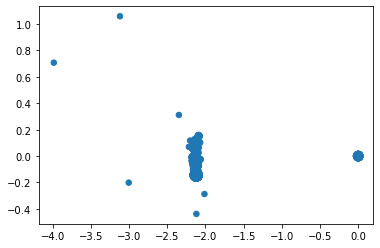

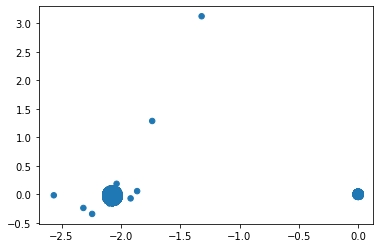

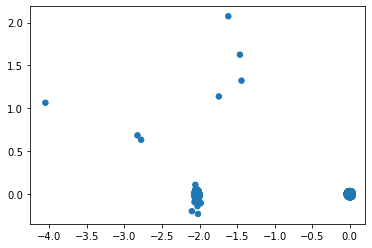

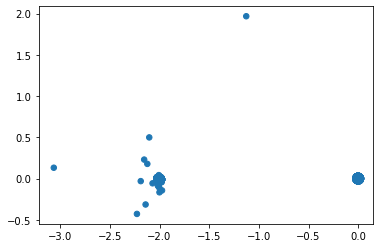

In [33]:
import itertools
from collections import Counter

file = dir + "/bd.log"

f = open(file)
data = f.readlines()
i = 0
count = 0
coords = []
x = []
y = []
for d in data:
    if i == 200:
        i = 0
        if count == 50:
            break
        if count % 5 == 0:
            c = Counter(zip(x,y))
            s = [5*(c[(xx,yy)]+5) for xx,yy in zip(x,y)]
            plt.scatter(x, y, s=s)
            plt.show()
        # coords.append([x, y])
        x, y = [], []
        count += 1
    s = d.split(" ")
    x.append(float(s[0]))
    y.append(float(s[1]))
    i += 1

On constate sur les plot ci-dessus que très rapidement, le point final se décale très vite vers la gauche pour se rapprocher de l'objectif qui est en (-2, 0) (Les deux plus gros cercles représentent le point de départ (0, 0) et le point d'arrivée du bras.

### 2.2 Variante NS

Mêmes questions avec la variante NS.

In [42]:
%run -i 'ea_dps_ka.py'

Fitness max :  -2.724601064039169


100%|███████████████████████████████████████| 1000/1000 [10:39<00:00,  1.56it/s]

Coverage: 77.25 % (7725 cells out of 10000) Max score: -0.08 Min score: -11.95 Total quality: -52496.22
Results saved in completed_runs/res_arm_NS_2022_12_10_10:46:31


['-1000000', '-1000000', '-1000000', '-6.983202665301618', '-1000000', '-3.3471693104904476', '-1000000', '-1000000', '-5.593267910459785', '-1000000']


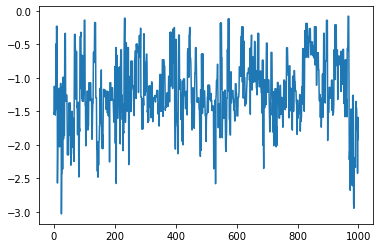

In [43]:
dir = "completed_runs/res_arm_NS_2022_12_10_10:46:31/"
f = open(dir+"fit.log", "r")
# print(f.read())
txt = f.read()
fits = txt.split("\n")[1:]
print(fits[:10])

l = []
_max = -1e6
for fit in fits:
    if len(fit) != 0:
        if fit[0] == "#":
            #print(fit)
            l.append(_max)
            _max = -1e6
        else:
            new = float(fit)
            _max = max(_max, new)
            
fits = txt.split("\n")[1:]
#print(fits[6:])
fits = [float(x) for x in fits if len(x)!=0 and x[0]!="#"]
#print(fits[:10])

plt.plot([i for i in range(len(l))], l)

Text(0, 0.5, "Nombre de fois ou l'objectif est atteint (<0.5)")

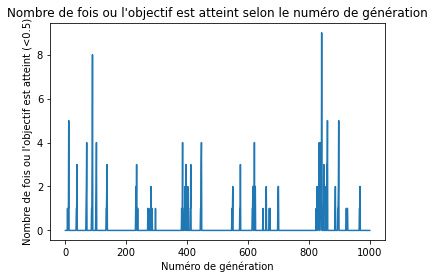

In [44]:
d = read_info(dir+"info.log")

touch_objective = []
for gens in d:
    touch_obj = 0
    for it in gens:
        if abs(it['dist_end_effector']) < 0.5:
            touch_obj += 1
    touch_objective.append(touch_obj)
    
plt.plot([i for i in range(len(touch_objective))], touch_objective)
plt.title("Nombre de fois ou l'objectif est atteint selon le numéro de génération")
plt.xlabel("Numéro de génération")
plt.ylabel("Nombre de fois ou l'objectif est atteint (<0.5)")

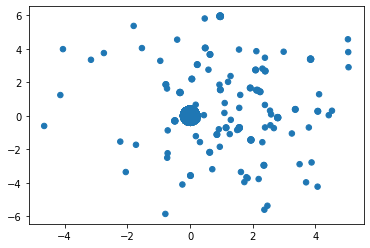

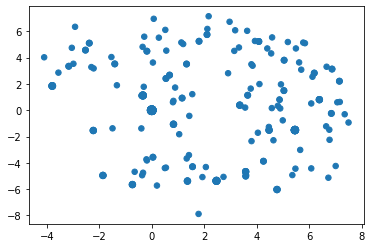

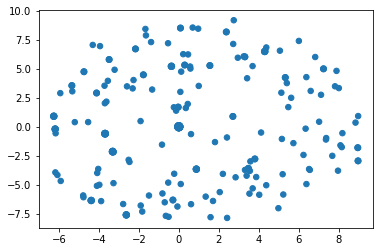

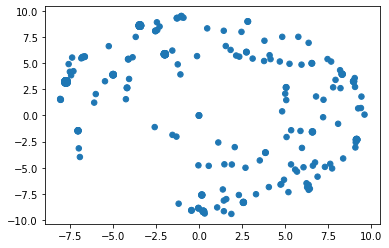

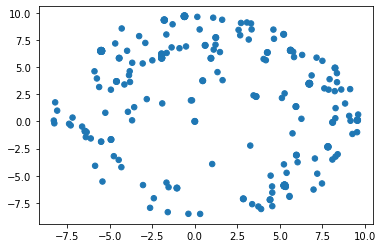

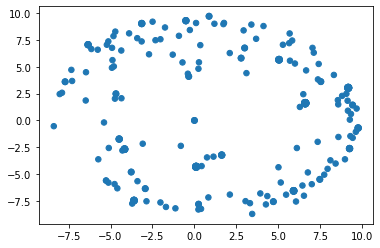

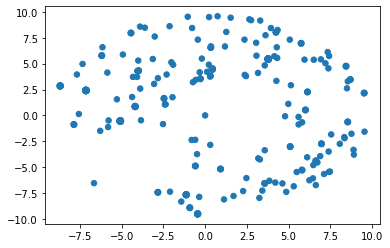

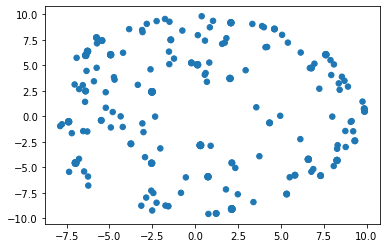

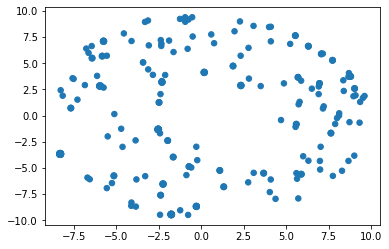

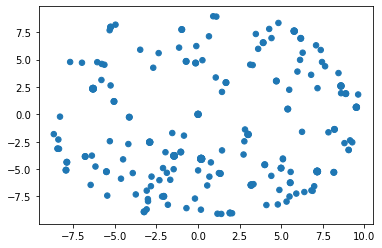

In [45]:
file = dir + "bd.log"

f = open(file)
data = f.readlines()
i = 0
count = 0
coords = []
x = []
y = []
for d in data:
    if i == 200:
        i = 0
        if count == 50:
            break
        if count % 5 == 0:
            c = Counter(zip(x,y))
            s = [5*(c[(xx,yy)]+5) for xx,yy in zip(x,y)]
            plt.scatter(x, y, s=s)
            plt.show()
        # coords.append([x, y])
        x, y = [], []
        count += 1
    s = d.split(" ")
    x.append(float(s[0]))
    y.append(float(s[1]))
    i += 1

### 2.3 Variante FIT+NS

Mêmes questions avec la variante qui utilise 2 objectifs: Fitness et Novelty (variante FIT+NS). 

In [40]:
#%run -i 'ea_dps_ka.py'

['-3.8708651301519903', '-5.249716050778634', '-1000000', '-3.6216422810203692', '-4.882859021261628', '-4.325878018102239', '-2.6468993674165606', '-1000000', '-3.9975629322623285', '-6.062703505980778']


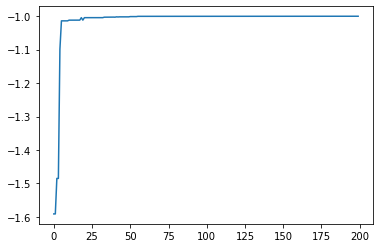

In [41]:
dir = "completed_runs/res_arm_FIT_NS_2022_12_09_20:05:15/"
f = open(dir+"fit.log", "r")
# print(f.read())
txt = f.read()
fits = txt.split("\n")[1:]
print(fits[:10])

l = []
_max = -1e6
for fit in fits:
    if len(fit) != 0:
        if fit[0] == "#":
            #print(fit)
            l.append(_max)
            _max = -1e6
        else:
            new = float(fit)
            _max = max(_max, new)
            
fits = txt.split("\n")[1:]
#print(fits[6:])
fits = [float(x) for x in fits if len(x)!=0 and x[0]!="#"]
#print(fits[:10])

plt.plot([i for i in range(len(l))], l)

Text(0, 0.5, "Nombre de fois ou l'objectif est atteint (<0.5)")

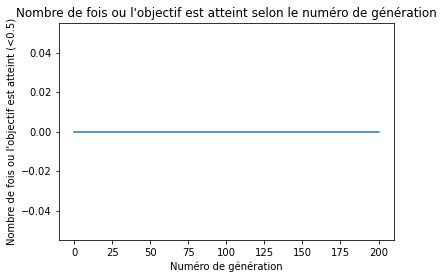

In [42]:
d = read_info(dir+"info.log")

touch_objective = []
for gens in d:
    touch_obj = 0
    for it in gens:
        if abs(it['dist_end_effector']) < 0.5:
            touch_obj += 1
    touch_objective.append(touch_obj)
    
plt.plot([i for i in range(len(touch_objective))], touch_objective)
plt.title("Nombre de fois ou l'objectif est atteint selon le numéro de génération")
plt.xlabel("Numéro de génération")
plt.ylabel("Nombre de fois ou l'objectif est atteint (<0.5)")

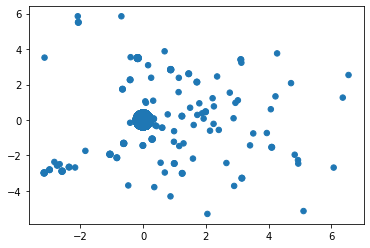

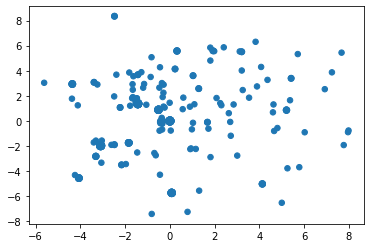

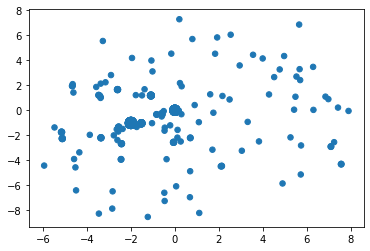

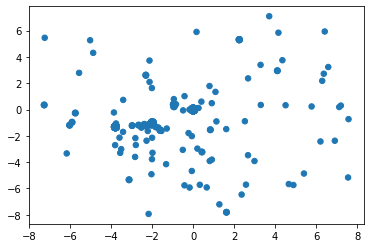

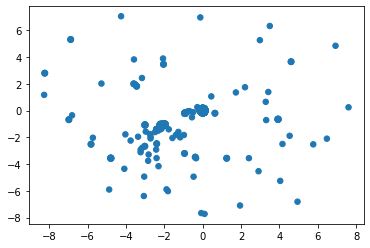

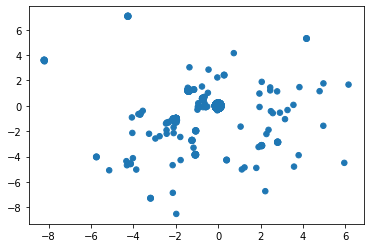

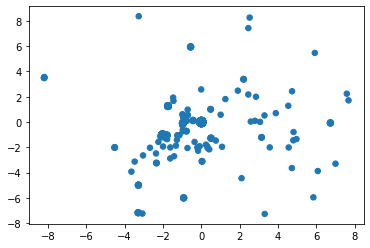

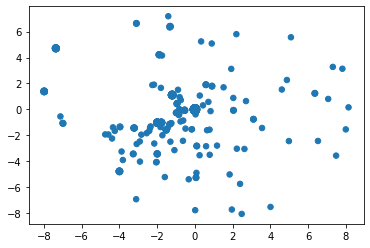

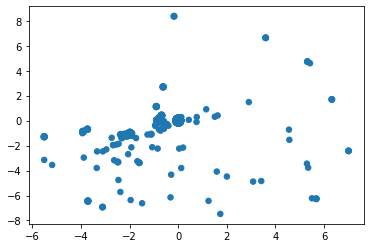

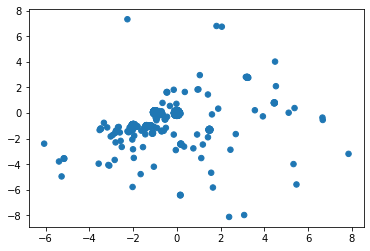

In [43]:
file = dir + "bd.log"

f = open(file)
data = f.readlines()
i = 0
count = 0
coords = []
x = []
y = []
for d in data:
    if i == 200:
        i = 0
        if count == 50:
            break
        if count % 5 == 0:
            c = Counter(zip(x,y))
            s = [5*(c[(xx,yy)]+5) for xx,yy in zip(x,y)]
            plt.scatter(x, y, s=s)
            plt.show()
        # coords.append([x, y])
        x, y = [], []
        count += 1
    s = d.split(" ")
    x.append(float(s[0]))
    y.append(float(s[1]))
    i += 1

## 3 Diversité des comportements générés




La position finale de chaque point généré est enregistrée dans le fichier bd.log. Tracez ces différents points sur une même figure pour une experience de NS, de FIT et de FIT+NS. Qu'en déduisez-vous sur la capacité d'exploration de chacun de ces algorithmes ? 

In [29]:
import pandas as pd # using pandas to simplify the code

In [32]:
path = "completed_runs/"
path_fit = "res_arm_FIT_2022_12_02_11:53:34/"
path_ns ="res_arm_NS_2022_12_09_20:00:59/"
path_fit_ns = "res_arm_FIT_NS_2022_12_09_20:05:15/"

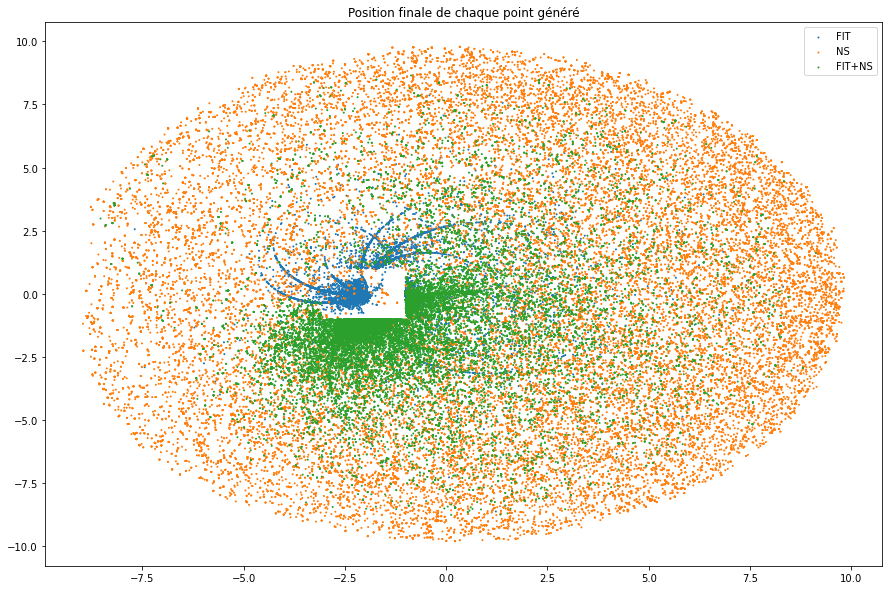

In [49]:
df_fit = pd.read_csv(path + path_fit + "bd.log", names=["x","y"] , delimiter=" ")
df_ns = pd.read_csv(path + path_ns + "bd.log", names=["x","y"] , delimiter=" ")
df_fit_ns = pd.read_csv(path + path_fit_ns + "bd.log", names=["x","y"] , delimiter=" ")

plt.figure(figsize=(15,10))
plt.title("Position finale de chaque point généré")
plt.scatter(df_fit["x"],df_fit["y"], label="FIT", s = [1 for n in range(len(df_fit["x"]))])
plt.scatter(df_ns["x"],df_ns["y"] ,label="NS", s = [1 for n in range(len(df_ns["x"]))])
plt.scatter(df_fit_ns["x"],df_fit_ns["y"], label="FIT+NS", s = [1 for n in range(len(df_fit_ns["x"]))])

plt.legend()
#plt.scatter(df_fit["x"],df_fit["y"])
plt.show()

Tracez sur des figures séparées les points générés pour plusieurs générations successives de NS, FIT et FIT+NS (par exemple 90, 91, 92). Que constatez vous ? 

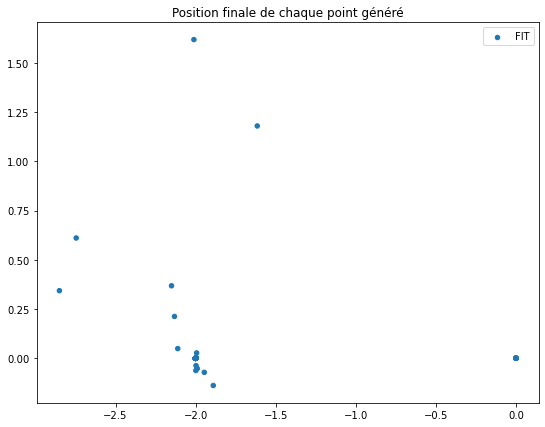

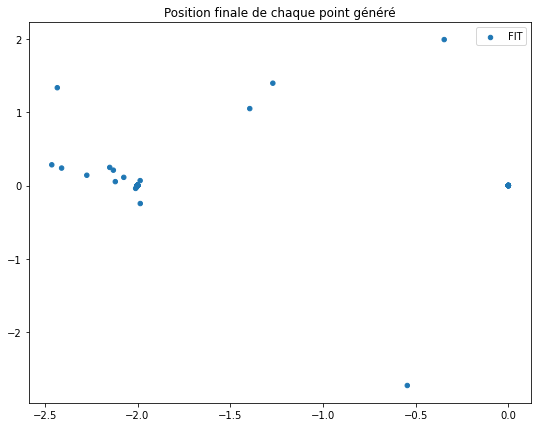

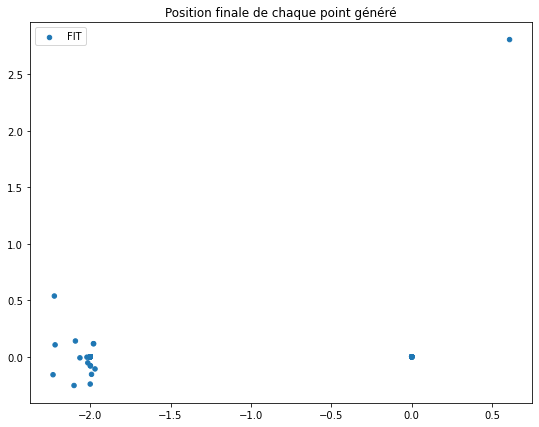

In [59]:
for i in range(89, 92):
    plt.figure(figsize=(9,7))
    plt.title("Position finale de chaque point généré")
    plt.scatter(df_fit["x"][i*200-1:(i+1)*200-1], df_fit["y"][i*200-1:(i+1)*200-1] ,label="FIT", s = [20 for n in range(200)])

    plt.legend()
    plt.show()

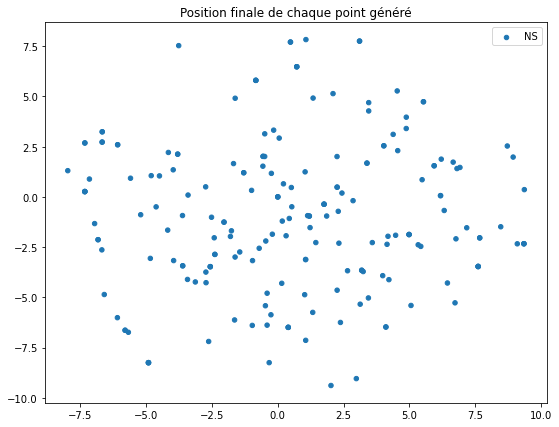

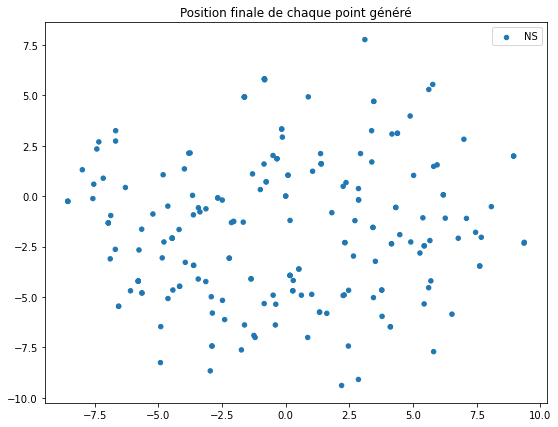

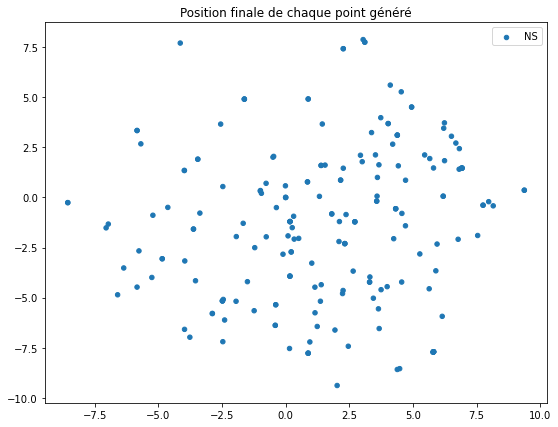

In [58]:
for i in range(89, 92):
    plt.figure(figsize=(9,7))
    plt.title("Position finale de chaque point généré")
    plt.scatter(df_ns["x"][i*200-1:(i+1)*200-1], df_ns["y"][i*200-1:(i+1)*200-1] ,label="NS", s = [20 for n in range(200)])

    plt.legend()
    #plt.scatter(df_fit["x"],df_fit["y"])
    plt.show()

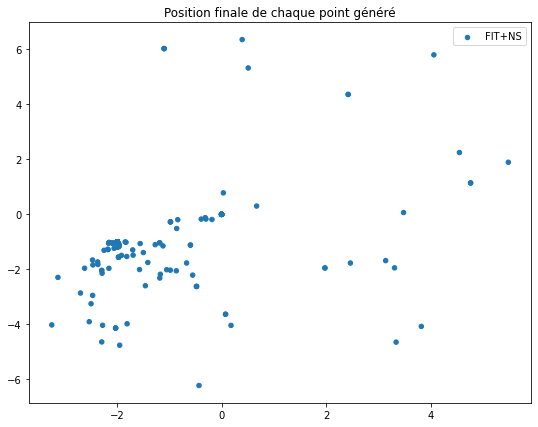

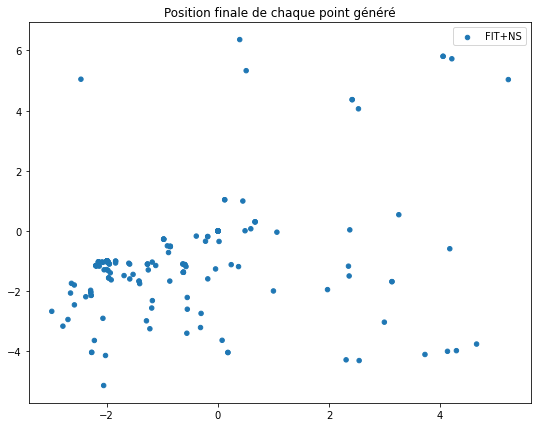

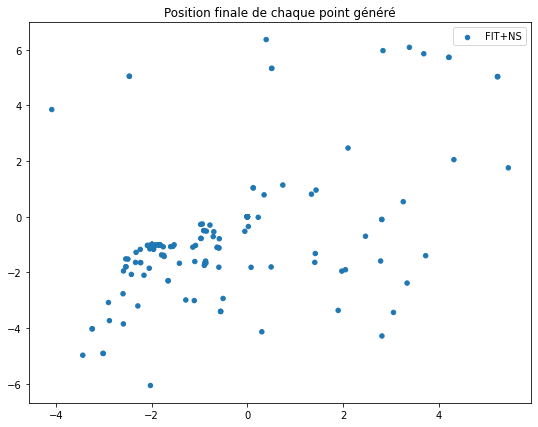

In [60]:
for i in range(89, 92):
    plt.figure(figsize=(9,7))
    plt.title("Position finale de chaque point généré")
    plt.scatter(df_fit_ns["x"][i*200-1:(i+1)*200-1], df_fit_ns["y"][i*200-1:(i+1)*200-1] ,label="FIT+NS", s = [20 for n in range(200)])

    plt.legend()
    #plt.scatter(df_fit["x"],df_fit["y"])
    plt.show()

## 4 Ajout d'une qualité locale

L'ensemble des solutions générées peut être utilisé pour atteindre n'importe lequel des comportements atteignables, mais l'inconvénient de cette approche est que la notion de qualité est totalement absente du processus, or parmi les solutions générant un comportement donné, toutes ne se valent pas. Certaines sont plus intéressantes que d'autres parce qu'elle consomment moins d'énergie, qu'elles ne créent pas de collision, qu'elles sont plus stables, etc.

Une solution pour prendre en compte un tel critère de qualité consiste à utiliser, à côté de l'objectif de nouveauté, un objectif de performance. Définir cet objectif comme une pression globale est contreproductif, car pour éviter des collisions ou minimiser la consommation d'énergie, il suffit de ne pas bouger... Pour rendre cette pression plus intéressante, il faut en faire un objectif non pas global, mais local.

Pour cela, on peut suivre l'approche proposée par Lehman et Stanley [1]: on compare la fitness de l'individu considéré avec celle de ses plus proches voisins (qui sont déjà déterminés pour le calcul de nouveauté). On ajoute alors un objectif de compétition locale qui vaut le nombre de voisins dont la fitness est inférieure.

Complétez le code de novelty_search.py pour que la fonction de calcul de nouveauté renvoie la nouveauté et l'objectif de compétition locale. Pour cela, vous devrez garder dans l'archive la liste des fitness des points ajoutés.

Utilisez cette nouvelle version pour générer des politiques qui permettent d'atteindre les différentes positions de l'espace en minimisant un tel critère, par exemple l'écart-type sur les angles du bras.

Vous créerez une nouvelle variante et reprendrez le tracé de l'espace exploré en indiquant par une couleur la qualité de chaque point ("heat-map"). Vous comparerez, visuellement, les résultats des différentes variantes.

* [1] Lehman, J., & Stanley, K. O. (2011). Evolving a diversity of virtual creatures through novelty search and local competition. In Proceedings of GECCO

In [44]:
#%run -i 'ea_dps_ka.py'

['-5.801434797574405', '-4.5110450809883265', '-1.6618667123046387', '-5.162305444078307', '-2.339715573932016', '-4.537096170100043', '-3.580416167770389', '-1000000', '-3.2864239233332806', '-4.337489608113151']


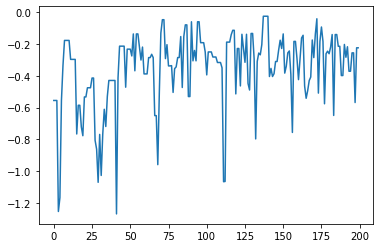

In [45]:
dir = "completed_runs/res_arm_NSLC_2022_12_09_23:45:09/"
f = open(dir+"fit.log", "r")
# print(f.read())
txt = f.read()
fits = txt.split("\n")[1:]
print(fits[:10])

l = []
_max = -1e6
for fit in fits:
    if len(fit) != 0:
        if fit[0] == "#":
            #print(fit)
            l.append(_max)
            _max = -1e6
        else:
            new = float(fit)
            _max = max(_max, new)
            
fits = txt.split("\n")[1:]
#print(fits[6:])
fits = [float(x) for x in fits if len(x)!=0 and x[0]!="#"]
#print(fits[:10])

plt.plot([i for i in range(len(l))], l)

Text(0, 0.5, "Nombre de fois ou l'objectif est atteint (<0.5)")

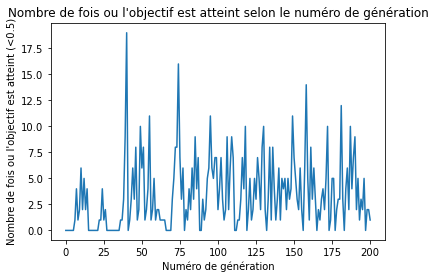

In [46]:
d = read_info(dir+"info.log")

touch_objective = []
for gens in d:
    touch_obj = 0
    for it in gens:
        if abs(it['dist_end_effector']) < 0.5:
            touch_obj += 1
    touch_objective.append(touch_obj)
    
plt.plot([i for i in range(len(touch_objective))], touch_objective)
plt.title("Nombre de fois ou l'objectif est atteint selon le numéro de génération")
plt.xlabel("Numéro de génération")
plt.ylabel("Nombre de fois ou l'objectif est atteint (<0.5)")

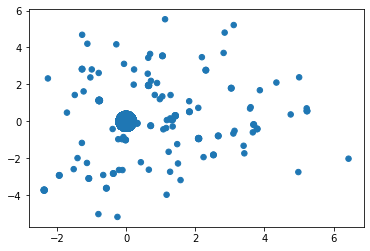

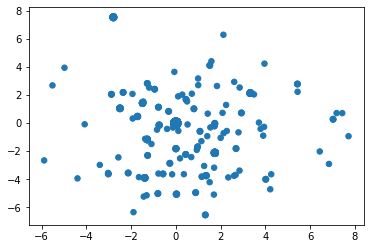

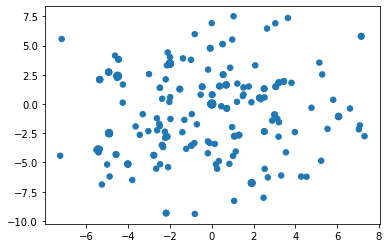

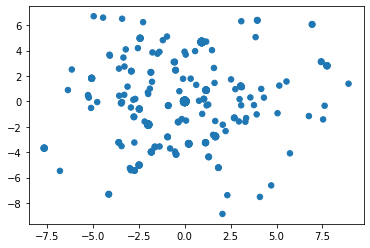

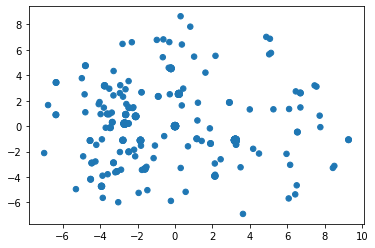

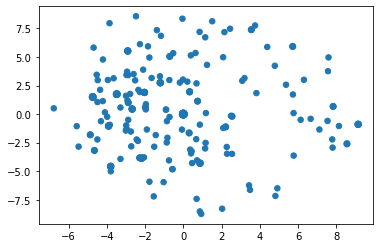

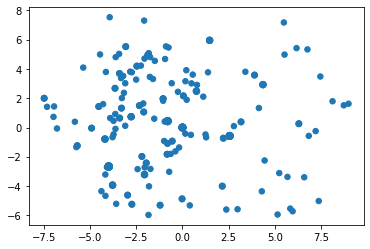

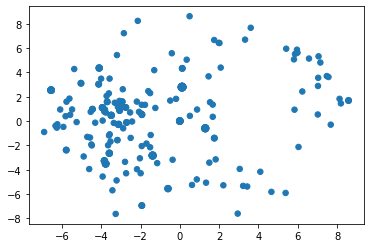

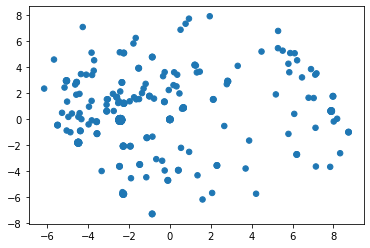

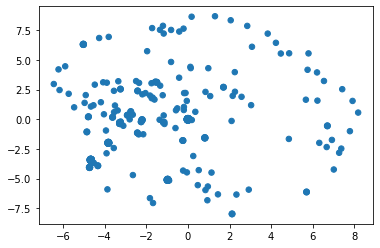

In [47]:
file = dir + "bd.log"

f = open(file)
data = f.readlines()
i = 0
count = 0
coords = []
x = []
y = []
for d in data:
    if i == 200:
        i = 0
        if count == 50:
            break
        if count % 5 == 0:
            c = Counter(zip(x,y))
            s = [5*(c[(xx,yy)]+5) for xx,yy in zip(x,y)]
            plt.scatter(x, y, s=s)
            plt.show()
        # coords.append([x, y])
        x, y = [], []
        count += 1
    s = d.split(" ")
    x.append(float(s[0]))
    y.append(float(s[1]))
    i += 1

Afin de réaliser cette étape, nous avons ajouté un classement selon les k voisins et ajouté cette variable à l'objectif de maximisation. On constate que cela améliore nettement les résultats de l'algorithme NS ce qui prouve que l'ajout de comparaison local améliore l'algorithme. Cependant l'algorithme fit apporte tout de même de bien meilleurs résultats

Pour voir les modifications apportées :
- novelty_search.py l:107
- ea_dps_ka.py l:213 + ajout configuration NSLC

/!\ problème avec python 3.\*, en effet la fonction sorted() n'accepte plus de lambda. 

## 5 "Illuminer" l'espace exploré

### 5.1 Quantifier l'espace comportemental exploré

Définissez une grille dans l'espace comportemental qui va vous permettre de mesurer l'espace exploré. Découpez l'espace en cases (vous ignorerez les murs pour simplifier) et écrivez une fonction permettant de placer un individu dans la case correspondant à son descripteur comportemental une fois qu'il a été évalué. Il n'y aura qu'un seul individu par case. Lorsque vous tentez d'ajouter un individu dans une case, si elle est déjà remplie, le nouvel individu remplacera l'ancien si sa fitness est plus élevée. 

Cette grille est (pour l'instant) indépendante de l'algorithme d'apprentissage. Elle vise simplement à mesurer la capacité de ce dernier à explorer cet espace et à retrouver facilement, si besoin, une politique efficace permettant d'atteindre un comportement donné.

Vous mesurerez la couverture de votre exploration (pourcentage de cellules explorées). Utilisez une grille de 100x100 cases et déterminez la couverture pour les trois variantes: FIT, NS, FIT+NS et NSLC (vous pourrez vous contenter d'une seule expérience). 


### FIT

In [1]:
%run -i 'ea_dps_ka.py'

/home/thomas/anaconda3/lib/python3.9/site-packages/scoop/fallbacks.py:38: RuntimeWarning: SCOOP was not started properly.
Be sure to start your program with the '-m scoop' parameter. You can find further information in the documentation.
Your map call has been replaced by the builtin serial Python map().
  warnings.warn(


Fitness max :  -3.7420898429628626


100%|█████████████████████████████████████████| 200/200 [01:59<00:00,  1.68it/s]

Coverage: 6.86 % (686 cells out of 10000) Max score: -1.00 Min score: -9.79 Total quality: -2809.93
Results saved in completed_runs/res_arm_FIT_2022_12_10_09:23:19


Très efficace pour un seul objectif mais très faible exploration

### NS

In [2]:
%run -i 'ea_dps_ka.py'

/home/thomas/anaconda3/lib/python3.9/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'MyFitness' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/thomas/anaconda3/lib/python3.9/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/thomas/anaconda3/lib/python3.9/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'Strategy' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


Fitness max :  -1000000


100%|█████████████████████████████████████████| 200/200 [01:59<00:00,  1.68it/s]

Coverage: 57.62 % (5762 cells out of 10000) Max score: -1.01 Min score: -11.86 Total quality: -40494.58
Results saved in completed_runs/res_arm_NS_2022_12_10_09:26:28


Très bonne exploration

### FIT+NS

In [3]:
%run -i 'ea_dps_ka.py'

Fitness max :  -3.4138531764751114


100%|█████████████████████████████████████████| 200/200 [02:00<00:00,  1.66it/s]

Coverage: 18.38 % (1838 cells out of 10000) Max score: -0.00 Min score: -1000000.00 Total quality: -1008596.87
Results saved in completed_runs/res_arm_FIT_NS_2022_12_10_09:28:51


Exploration faible mais tout de même plus importante que fit

### NSLC

In [1]:
%run -i 'ea_dps_ka.py'

/home/thomas/anaconda3/lib/python3.9/site-packages/scoop/fallbacks.py:38: RuntimeWarning: SCOOP was not started properly.
Be sure to start your program with the '-m scoop' parameter. You can find further information in the documentation.
Your map call has been replaced by the builtin serial Python map().
  warnings.warn(


Fitness max :  -1.4454161419863794


100%|█████████████████████████████████████████| 200/200 [02:08<00:00,  1.56it/s]

Coverage: 47.60 % (4760 cells out of 10000) Max score: -0.02 Min score: -11.48 Total quality: -27258.06
Results saved in completed_runs/res_arm_NSLC_2022_12_10_00:17:50


Pour NSLC, l'exploration se rapproche de NS sans pour autant être aussi importante

### 5.2 MAP-Elites

#### 5.2.1 Implémentation de MAP-Elites

La grille définie à la question précédente permet de définir un algorithme très simple: MAP-Elites [1]. Dans cet algorithme, la sélection s'appuie sur la grille. La génération d'un nouvel individu consiste à tirer aléatoirement un (si mutation uniquement) ou deux individus (si croisement) dans la grille puis à appliquer l'opérateur génétique de mutation ou de croisement. Après évaluation, on tente d'ajouter cet individu dans la grille. Si la case correspondante est vide, on l'ajoute, sinon, on le compare à l'individu déjà présent et on le remplace si la fitness est améliorée.

Utilisez cet algorithme sur la tâche précédente et affichez les résultats: évolution de la couverture et grille finale obtenue.



* [1] Mouret, J. B., & Clune, J. (2015). Illuminating search spaces by mapping elites. arXiv preprint arXiv:1504.04909

### Réponse
Le code est disponible sur le fichier ea_dps_ka.py l:270 - l:301

### FIT

In [40]:
%run -i 'ea_dps_ka.py'

Fitness max :  -2.1368828488845697


100%|█████████████████████████████████████████| 200/200 [02:10<00:00,  1.53it/s]

Coverage: 54.54 % (5454 cells out of 10000) Max score: -0.12 Min score: -11.46 Total quality: -33327.40
Results saved in completed_runs/res_arm_FIT_NS_2022_12_10_10:30:53


Enorme augmentation de l'exploration pour FIT

### NS

In [36]:
%run -i 'ea_dps_ka.py'

/home/thomas/anaconda3/lib/python3.9/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'MyFitness' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/thomas/anaconda3/lib/python3.9/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/thomas/anaconda3/lib/python3.9/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'Strategy' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


Fitness max :  -4.956759707659404


100%|█████████████████████████████████████████| 200/200 [02:09<00:00,  1.54it/s]

Coverage: 50.65 % (5065 cells out of 10000) Max score: -0.26 Min score: -11.31 Total quality: -30439.54
Results saved in completed_runs/res_arm_NS_2022_12_10_10:19:32


<Figure size 432x288 with 0 Axes>

### FIT+NS

In [37]:
%run -i 'ea_dps_ka.py'

Fitness max :  -5.2364853025740095


100%|█████████████████████████████████████████| 200/200 [02:19<00:00,  1.44it/s]

Coverage: 50.89 % (5089 cells out of 10000) Max score: -0.04 Min score: -11.41 Total quality: -30321.02
Results saved in completed_runs/res_arm_FIT_NS_2022_12_10_10:24:05


### NSLC

In [41]:
%run -i 'ea_dps_ka.py'

Fitness max :  -3.230255795101443


100%|█████████████████████████████████████████| 200/200 [02:08<00:00,  1.56it/s]

Coverage: 57.06 % (5706 cells out of 10000) Max score: -0.38 Min score: -11.48 Total quality: -35886.74
Results saved in completed_runs/res_arm_NSLC_2022_12_10_10:33:25


Cette algorithme augmente fortement le coverage de tous les algorithmes et encore plus celui de NSLC grace à la combinaison entre comparaison locale et mutation / croisement par map-elites 

#### 5.2.2 OPTION: Variantes de MAP-Elites

MAP-Elites peut aussi être amélioré avec des stratégies de choix des parents qui ne sont plus uniformes sur toute la grille, mais biaisées pour favoriser les cellules isolées ou les individus dont les descendants ont réussi à remplir des cellules (score de "curiosité" [1]). Testez cette variante sur la tâche précédente et observez l'évolution de la couverture ainsi que la grille finale obtenue.

* [1] Cully, A., & Demiris, Y. (2017). Quality and diversity optimization: A unifying modular framework. IEEE Transactions on Evolutionary Computation, 22(2), 245-259.

In [4]:
# <à compléter>

# indiquez ici les résultats trouvés